logistic regression And perceptron trick both are applied to linearly seprable data 

in this we use general eqn of line Ax+By+c=0

<a href="https://medium.com/@abhirajj701/logistic-regression-part-1-perceptron-trick-15c7d0371317">read at medium</a>

problems with perceptron 

 it stops as soon it classify all data it dont care whether it is a perfect line or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [18]:
X,y=make_classification(n_samples=100,n_features=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,random_state=42)
y

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

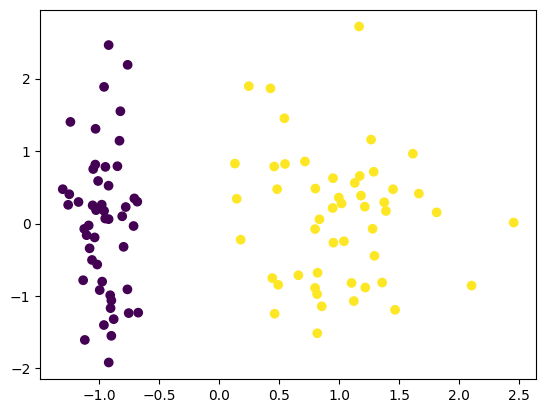

In [19]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
class Perceptron:
    def __init__(self,lr,epochs):
        self.lr=lr
        self.epochs=epochs
        self.weights=None

    def activate(self,i):
        
        return 1 if i>0 else 0
        
    def fit(self,X,y):
        X=np.insert(X,0,1,axis=1)
        self.weights=np.ones(X.shape[1])
        
        for i in range(self.epochs):
            i=np.random.randint(0,len(X))
            y_hat=self.activate(X[i].T@self.weights)
            self.weights=self.weights+self.lr*X[i]*(y[i]-y_hat)
        return self.weights
    def predict(self,X):
        X=np.insert(X,0,1,axis=1)
        return [ self.activate(i)  for i in X @ self.weights ]

In [59]:
pr=Perceptron(0.01,1000)
wts=pr.fit(X_train,y_train)
y_pred=pr.predict(X_test)

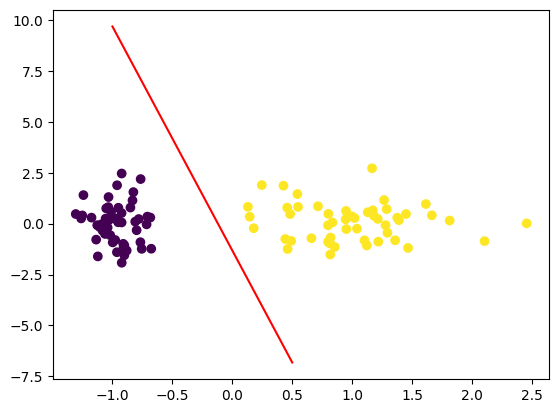

In [60]:
x=np.linspace(-1,0.5,100)

# w0+w1x+w2y=0

coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
plt.plot(x,x * coef +intercept,"r-")
plt.scatter(x=X[:,0],y=X[:,1],c=y)

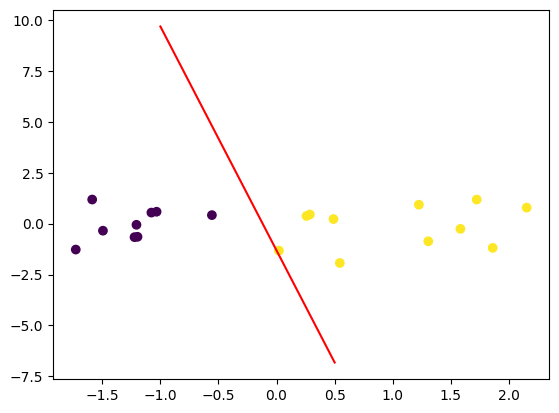

In [61]:
# prediction

x=np.linspace(-1,0.5,100)

# w0+w1x+w2y=0

coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
plt.plot(x,x * coef +intercept,"r-")
plt.scatter(x=X_test[:,0],y=X_test[:,1],c=y_pred)